## OCS Data View Data Analysis Notebook 

### This version is a modified version of https://github.com/osisoft/OSI-Samples-OCS/tree/master/advanced_samples/DataViewWind/Jupyter for the [Academic Hub](https://osisoft.com/academia)

**Install the Academic Hub library**

In [1]:
!pip install ocs_academic_hub plotly

### Import required modules and HubClient 

In [2]:
import requests
import json
import pandas as pd
from datetime import date, timedelta

import matplotlib.pyplot as plt
import numpy as np

from ocs_academic_hub import HubClient

### Login to Academic Hub by running the next cell

On success a new browser tab with message **You can now return to the application.** will show up. Close it and come back here.

In [3]:
hub = HubClient()

Step 1: Get OAuth endpoint configuration...
Step 2: Set up server to process authorization response...
Step 3: Authorize the user...
Step 4: Set server to handle one request...


127.0.0.1 - - [22/Oct/2020 17:31:33] "GET /callback.html?code=YLZu59RGHD4UiZRnwa65L8UT0fe_30IiVK2mtZ7cPUk&scope=openid%20ocsapi&session_state=F_flt-k7aAPvKWPIUUkMaAEteX8gbBnhsE5QBuKlgs0.lkaXXtCsvuUU2h_XB6CiCw HTTP/1.1" 200 -


Step 5: Get a token using the authorization code...
Step 6: Access token read ok
Complete!
@ Hub data file: hub_datasets.json


### Standard Hub Datasets

Note: Wind Farm dataset is not part of Hub standard datasets. For more info on those: https://academic.osisoft.com/datasets

In [4]:
hub.datasets()

['Brewery', 'Campus_Energy', 'WindFarm']

### Request dataset information for the lab

In [5]:
hub.refresh_datasets(additional_status="ocs_lab")

@ Hub data file: hub_datasets.json
@ Current dataset: Brewery


### Check that WindFarm dataset is now available

In [6]:
hub.datasets()

['Brewery', 'Campus_Energy', 'WindFarm']

### Make it the current dataset

In [7]:
hub.set_dataset("WindFarm")
hub.current_dataset()

'WindFarm'

### OCS namespace where data lives

In [8]:
namespace_id = hub.namespace_of("WindFarm")
namespace_id

'academic_hub_01'

### List the assets in WindFarm

There are 10 wind turbines

In [9]:
hub.assets()

,Asset_Id,Description
0,GE01,Wind Turbine
1,GE02,Wind Turbine
2,GE03,Wind Turbine
3,GE04,Wind Turbine
4,GE05,Wind Turbine
5,GE06,Wind Turbine
6,GE07,Wind Turbine
7,GE08,Wind Turbine
8,GE09,Wind Turbine
9,GE10,Wind Turbine


In [10]:
df_metadata = hub.all_assets_metadata()
df_metadata

,Latitude,Longitude,Manufacturer,Model,Rated Power,Asset_Id
0,44.010618,-101.932064,Truvale,T95-2MW,1500.0,GE01
1,44.009198,-101.932150,ACME,1.5 csCWE,1500.0,GE02
2,44.008643,-101.932064,ACME,1.5 csCWE,1500.0,GE03
3,44.012161,-101.929661,Truvale,T95-2MW,1500.0,GE04
4,44.011174,-101.929833,Truvale,T95-2MW,800.0,GE05
5,44.010248,-101.930176,Truvale,T95-2MW,1500.0,GE06
6,44.009198,-101.929918,ACME,1.5 csCWE,1500.0,GE07
7,44.013396,-101.925906,GE,1.5 csCWE,1500.0,GE08
8,44.011976,-101.925627,GE,1.5 csCWE,1500.0,GE09
9,44.010294,-101.925080,GE,1.5 csCWE,1500.0,GE10


### Map of Wind Turbines

**NOTE: you need a Mapbox token in file `mapbox_token.txt` to run the next cell**

Free signup at https://account.mapbox.com/auth/signup/

**Screenshot**
![](https://academichub.blob.core.windows.net/images/ocs-windfarm-plotly-map.png)

#### Enable cell below if you have a Mapbox token only

### Get the list of all single-asset data views

In [11]:
hub.asset_dataviews()

['windfarm-ge01',
 'windfarm-ge02',
 'windfarm-ge03',
 'windfarm-ge04',
 'windfarm-ge05',
 'windfarm-ge06',
 'windfarm-ge07',
 'windfarm-ge08',
 'windfarm-ge09',
 'windfarm-ge10']

### Get the list of all multiple-asset data views 

There is a single one which we extract and save in `dataview_id`

In [12]:
dataview_id = hub.asset_dataviews(multiple_asset=True)[0]
dataview_id

'windfarm-ge01--10'

### Verify the structure of the data view

For wind turbine GE01 (data view `windfarm-ge01--10` is similar but with all turbines)

In [13]:
hub.dataview_definition(namespace_id, "windfarm-ge01")

,Asset_Id,Column_Name,Stream_Type,Stream_UOM,OCS_Stream_Name
5,GE01,Active Power,Float,kW,GE01_P.ACT_PV
7,GE01,Air Temperature,Float,Â°C,GE01_T.GEN.COOL_PV
0,GE01,Blade1 Actual Value,Float,Deg.,GE01_BL1.ACT_PV
1,GE01,Blade2 Actual Value,Float,Deg.,GE01_BL2.ACT_PV
2,GE01,Blade3 Actual Value,Float,Deg.,GE01_BL3.ACT_PV
6,GE01,Nacelle Position,Float,Deg.,GE01_POS.NAC_PV
3,GE01,Rotor Speed,Float,RPM,GE01_N.ROT.PLC_PV
4,GE01,Turbine State,Category,,GE01_OS_PV
8,GE01,Wind Speed,Float,m/s,GE01_V.WIN_PV


### Request data view result

For 11 days starting on 2020-01-01, interpolated every minute. Method `dataview_interpolated_pd` takes care of gathering multiple pages of data and returning a single Pandas dataframe.  

In [14]:
dateFrom = "2020-01-01"
dateTo = "2020-01-11"
timeinterval = "00:01:00"  # interpolate every minute

df = hub.dataview_interpolated_pd(
    namespace_id, dataview_id, dateFrom, dateTo, timeinterval
)
df

+++++++++++++++++
  ==> Finished 'dataview_interpolated_pd' in       44.0521 secs [ 3.27K rows/sec ]


,Timestamp,Asset_Id,Blade1 Actual Value,Blade2 Actual Value,Blade3 Actual Value,Rotor Speed,Active Power,Nacelle Position,Air Temperature,Wind Speed,Turbine State
0,2020-01-01 00:00:00,GE01,-0.395442,-0.323885,-0.414274,13.466848,287.49786,307.37880,58.056133,6.049535,Load Operation
1,2020-01-01 00:01:00,GE01,-0.393493,-0.321791,-0.412311,13.726380,298.28880,307.28470,58.029010,6.562997,Load Operation
2,2020-01-01 00:02:00,GE01,-0.391545,-0.319696,-0.410348,12.812403,240.00000,308.40002,58.001890,6.664002,Load Operation
3,2020-01-01 00:03:00,GE01,-0.389597,-0.317602,-0.408385,15.667851,468.68890,311.75644,57.974762,7.257180,Load Operation
4,2020-01-01 00:04:00,GE01,-0.387649,-0.315508,-0.406422,17.627472,678.64290,311.40848,57.947640,8.682961,Load Operation
...,...,...,...,...,...,...,...,...,...,...,...
144005,2020-01-10 23:56:00,GE10,-0.394645,-0.435129,-0.372694,20.019014,1108.33340,238.24925,70.417670,10.645750,Load Operation
144006,2020-01-10 23:57:00,GE10,-0.367548,-0.417710,-0.346564,19.761908,1258.00000,238.46340,70.379730,10.867880,Load Operation
144007,2020-01-10 23:58:00,GE10,-0.340452,-0.400290,-0.320435,19.921307,1333.00000,238.67754,70.341790,11.471340,Load Operation
144008,2020-01-10 23:59:00,GE10,-0.589882,-0.482977,-0.533493,19.805060,1233.00000,238.89168,70.303850,11.033120,Load Operation


In [15]:
# Renaming DataFrame column names to abbreviations, in order to display these column names clearly in a correlation plot

df.rename(
    columns={
        "Blade1 Actual Value": "BL1",
        "Blade2 Actual Value": "BL2",
        "Blade3 Actual Value": "BL3",
        "Rotor Speed": "RS",
        "Turbine": "TS",
        "Active Power": "AP",
        "Nacelle Position": "NP",
        "Air Temperature": "AT",
        "Wind Speed": "WS",
    },
    inplace=True,
)

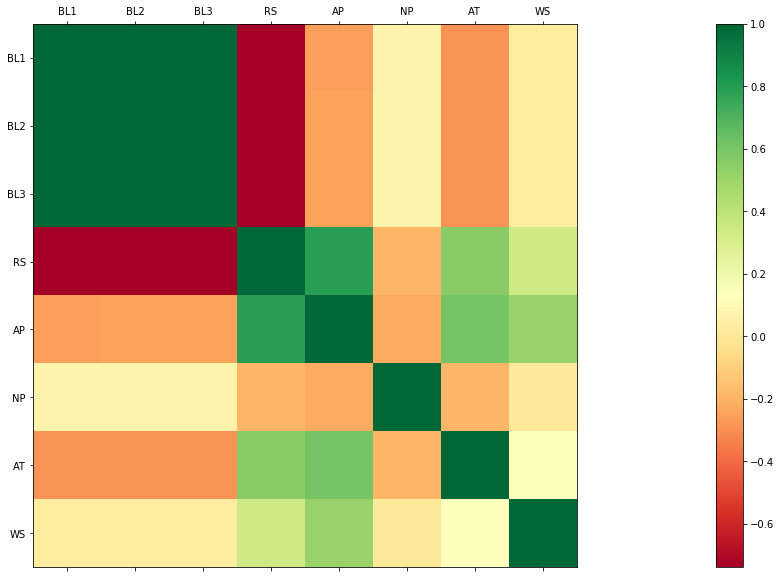

In [16]:
# Check the correlation between Active Power and the rest of the variables

# retrieve the correlation table
df_corr = df.corr()

# increase the size of the figure
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)

# set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

# configure the labels
labels = [c for c in df_corr.columns]

# make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [17]:
# Renaming DataFrame column names from abbreviations back to their original full names

df.rename(
    columns={
        "BL1": "Blade1",
        "BL2": "Blade2",
        "BL3": "Blade3",
        "RS": "Rotor Speed Value",
        "TS": "Turbine",
        "AP": "Active Power Value",
        "NP": "Nacelle Position Value",
        "AT": "Air Temperature Value",
        "WS": "Wind Speed Value",
    },
    inplace=True,
)
df

,Timestamp,Asset_Id,Blade1,Blade2,Blade3,Rotor Speed Value,Active Power Value,Nacelle Position Value,Air Temperature Value,Wind Speed Value,Turbine State
0,2020-01-01 00:00:00,GE01,-0.395442,-0.323885,-0.414274,13.466848,287.49786,307.37880,58.056133,6.049535,Load Operation
1,2020-01-01 00:01:00,GE01,-0.393493,-0.321791,-0.412311,13.726380,298.28880,307.28470,58.029010,6.562997,Load Operation
2,2020-01-01 00:02:00,GE01,-0.391545,-0.319696,-0.410348,12.812403,240.00000,308.40002,58.001890,6.664002,Load Operation
3,2020-01-01 00:03:00,GE01,-0.389597,-0.317602,-0.408385,15.667851,468.68890,311.75644,57.974762,7.257180,Load Operation
4,2020-01-01 00:04:00,GE01,-0.387649,-0.315508,-0.406422,17.627472,678.64290,311.40848,57.947640,8.682961,Load Operation
...,...,...,...,...,...,...,...,...,...,...,...
144005,2020-01-10 23:56:00,GE10,-0.394645,-0.435129,-0.372694,20.019014,1108.33340,238.24925,70.417670,10.645750,Load Operation
144006,2020-01-10 23:57:00,GE10,-0.367548,-0.417710,-0.346564,19.761908,1258.00000,238.46340,70.379730,10.867880,Load Operation
144007,2020-01-10 23:58:00,GE10,-0.340452,-0.400290,-0.320435,19.921307,1333.00000,238.67754,70.341790,11.471340,Load Operation
144008,2020-01-10 23:59:00,GE10,-0.589882,-0.482977,-0.533493,19.805060,1233.00000,238.89168,70.303850,11.033120,Load Operation


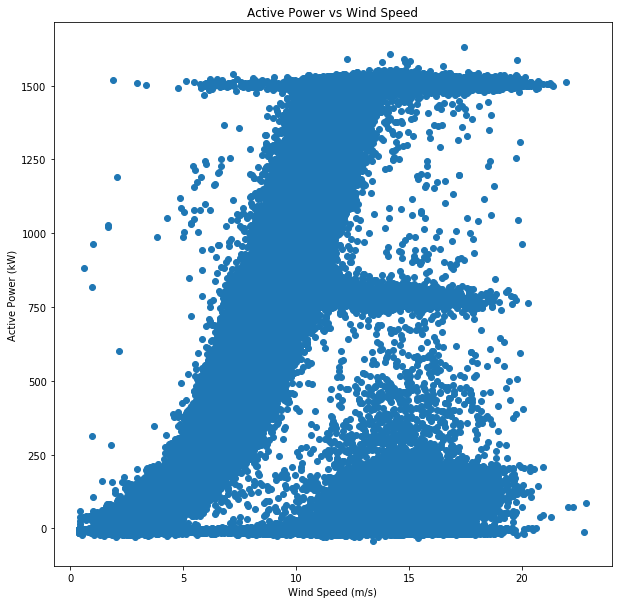

In [18]:
# Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df["Wind Speed Value"], df["Active Power Value"])
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Active Power (kW)")
ax.set_title("Active Power vs Wind Speed")

plt.show(block=False)

In [19]:
# df = df.dropna()
df

,Timestamp,Asset_Id,Blade1,Blade2,Blade3,Rotor Speed Value,Active Power Value,Nacelle Position Value,Air Temperature Value,Wind Speed Value,Turbine State
0,2020-01-01 00:00:00,GE01,-0.395442,-0.323885,-0.414274,13.466848,287.49786,307.37880,58.056133,6.049535,Load Operation
1,2020-01-01 00:01:00,GE01,-0.393493,-0.321791,-0.412311,13.726380,298.28880,307.28470,58.029010,6.562997,Load Operation
2,2020-01-01 00:02:00,GE01,-0.391545,-0.319696,-0.410348,12.812403,240.00000,308.40002,58.001890,6.664002,Load Operation
3,2020-01-01 00:03:00,GE01,-0.389597,-0.317602,-0.408385,15.667851,468.68890,311.75644,57.974762,7.257180,Load Operation
4,2020-01-01 00:04:00,GE01,-0.387649,-0.315508,-0.406422,17.627472,678.64290,311.40848,57.947640,8.682961,Load Operation
...,...,...,...,...,...,...,...,...,...,...,...
144005,2020-01-10 23:56:00,GE10,-0.394645,-0.435129,-0.372694,20.019014,1108.33340,238.24925,70.417670,10.645750,Load Operation
144006,2020-01-10 23:57:00,GE10,-0.367548,-0.417710,-0.346564,19.761908,1258.00000,238.46340,70.379730,10.867880,Load Operation
144007,2020-01-10 23:58:00,GE10,-0.340452,-0.400290,-0.320435,19.921307,1333.00000,238.67754,70.341790,11.471340,Load Operation
144008,2020-01-10 23:59:00,GE10,-0.589882,-0.482977,-0.533493,19.805060,1233.00000,238.89168,70.303850,11.033120,Load Operation


In [20]:
# df = df.dropna() #not needed
# Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
filterOutGE05 = df["Asset_Id"] != "GE05"
df_Filter = df[filterOutGE05]

In [21]:
# Filter out negative & excessive Active Power Values
filterNegativeActivePower = df_Filter["Active Power Value"] >= 0
df_Filter = df_Filter[filterNegativeActivePower]

In [22]:
# Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = ~(
    (df_Filter["Wind Speed Value"] > 10) & (df_Filter["Active Power Value"] < 600)
)
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [23]:
# Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter["Turbine State"] == "Load Operation"  # 16
df_Filter = df_Filter[filterLoadOperationState]

In [24]:
df_Filter

,Timestamp,Asset_Id,Blade1,Blade2,Blade3,Rotor Speed Value,Active Power Value,Nacelle Position Value,Air Temperature Value,Wind Speed Value,Turbine State
0,2020-01-01 00:00:00,GE01,-0.395442,-0.323885,-0.414274,13.466848,287.49786,307.37880,58.056133,6.049535,Load Operation
1,2020-01-01 00:01:00,GE01,-0.393493,-0.321791,-0.412311,13.726380,298.28880,307.28470,58.029010,6.562997,Load Operation
2,2020-01-01 00:02:00,GE01,-0.391545,-0.319696,-0.410348,12.812403,240.00000,308.40002,58.001890,6.664002,Load Operation
3,2020-01-01 00:03:00,GE01,-0.389597,-0.317602,-0.408385,15.667851,468.68890,311.75644,57.974762,7.257180,Load Operation
4,2020-01-01 00:04:00,GE01,-0.387649,-0.315508,-0.406422,17.627472,678.64290,311.40848,57.947640,8.682961,Load Operation
...,...,...,...,...,...,...,...,...,...,...,...
144005,2020-01-10 23:56:00,GE10,-0.394645,-0.435129,-0.372694,20.019014,1108.33340,238.24925,70.417670,10.645750,Load Operation
144006,2020-01-10 23:57:00,GE10,-0.367548,-0.417710,-0.346564,19.761908,1258.00000,238.46340,70.379730,10.867880,Load Operation
144007,2020-01-10 23:58:00,GE10,-0.340452,-0.400290,-0.320435,19.921307,1333.00000,238.67754,70.341790,11.471340,Load Operation
144008,2020-01-10 23:59:00,GE10,-0.589882,-0.482977,-0.533493,19.805060,1233.00000,238.89168,70.303850,11.033120,Load Operation


In [25]:
# Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter["Wind Speed Value"] < 13
df_Filter = df_Filter[filterOutHighWind]

In [26]:
df_Filter

,Timestamp,Asset_Id,Blade1,Blade2,Blade3,Rotor Speed Value,Active Power Value,Nacelle Position Value,Air Temperature Value,Wind Speed Value,Turbine State
0,2020-01-01 00:00:00,GE01,-0.395442,-0.323885,-0.414274,13.466848,287.49786,307.37880,58.056133,6.049535,Load Operation
1,2020-01-01 00:01:00,GE01,-0.393493,-0.321791,-0.412311,13.726380,298.28880,307.28470,58.029010,6.562997,Load Operation
2,2020-01-01 00:02:00,GE01,-0.391545,-0.319696,-0.410348,12.812403,240.00000,308.40002,58.001890,6.664002,Load Operation
3,2020-01-01 00:03:00,GE01,-0.389597,-0.317602,-0.408385,15.667851,468.68890,311.75644,57.974762,7.257180,Load Operation
4,2020-01-01 00:04:00,GE01,-0.387649,-0.315508,-0.406422,17.627472,678.64290,311.40848,57.947640,8.682961,Load Operation
...,...,...,...,...,...,...,...,...,...,...,...
144005,2020-01-10 23:56:00,GE10,-0.394645,-0.435129,-0.372694,20.019014,1108.33340,238.24925,70.417670,10.645750,Load Operation
144006,2020-01-10 23:57:00,GE10,-0.367548,-0.417710,-0.346564,19.761908,1258.00000,238.46340,70.379730,10.867880,Load Operation
144007,2020-01-10 23:58:00,GE10,-0.340452,-0.400290,-0.320435,19.921307,1333.00000,238.67754,70.341790,11.471340,Load Operation
144008,2020-01-10 23:59:00,GE10,-0.589882,-0.482977,-0.533493,19.805060,1233.00000,238.89168,70.303850,11.033120,Load Operation


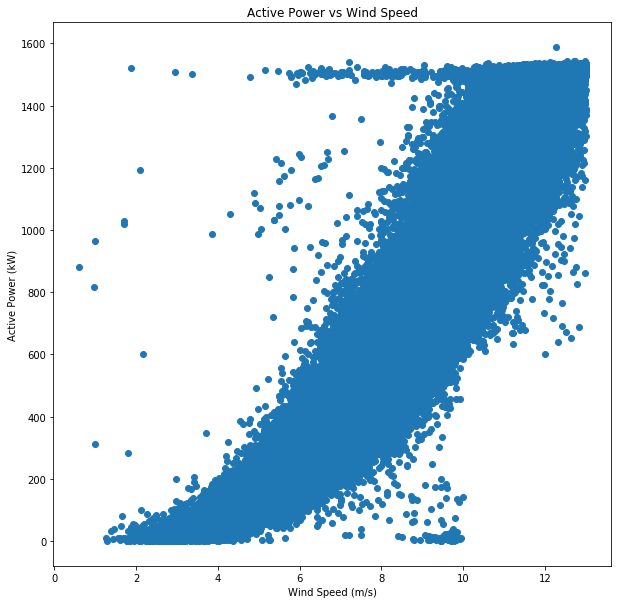

In [27]:
# Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter["Wind Speed Value"], df_Filter["Active Power Value"])
ax.set_xlabel("Wind Speed (m/s)")
ax.set_ylabel("Active Power (kW)")
ax.set_title("Active Power vs Wind Speed")

plt.show(block=False)

In [28]:
# Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split

# define the target variable to be predicted
y = df_Filter["Active Power Value"].values
# split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
    df_Filter[["Air Temperature Value", "Wind Speed Value"]].values,
    y,
    test_size=0.25,
    random_state=42,
)

In [29]:
# Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

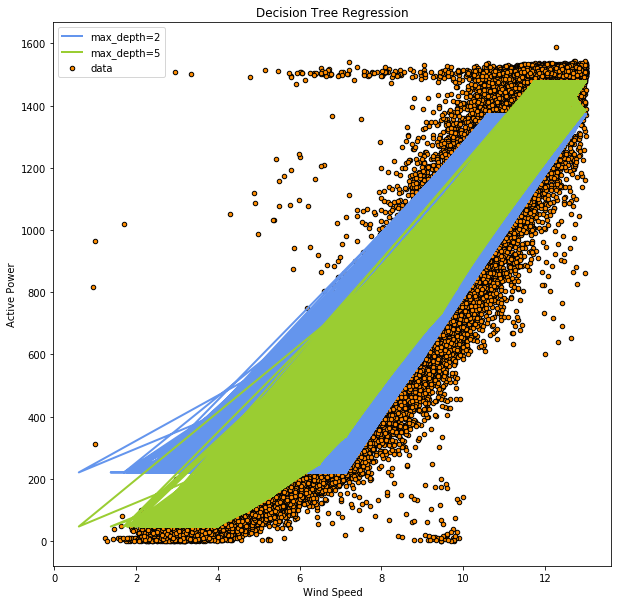

In [30]:
# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(
    X_train[:, 1], y_train, s=20, edgecolor="black", c="darkorange", label="data"
)
plt.plot(X_test[:, 1], y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test[:, 1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [31]:
# save the machine learning model to disk
import pickle

filename = "WT_ActivePower_model.sav"
pickle.dump(regr_2, open(filename, "wb"))

In [32]:
# Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, "rb"))
global result
result = loaded_model.score(X_test, y_test)
# print the model score
print(result)

0.9181829267957731


In [33]:
# Sample prediction
# define input
new_input = [[45, 6.6]]  # Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[336.83850558]


In [34]:
# Call the OpenWeather API to retrieve the forecasted air temperature and wind speed for Amarillo, TX for the next 5 days

url = "https://api.openweathermap.org/data/2.5/forecast?q=Amarillo,US&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast = requests.get(url)

In [35]:
responseWeatherForecast.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1603411200,
   'main': {'temp': 301.12,
    'feels_like': 295.77,
    'temp_min': 297.91,
    'temp_max': 301.12,
    'pressure': 1006,
    'sea_level': 1006,
    'grnd_level': 885,
    'humidity': 17,
    'temp_kf': 3.21},
   'weather': [{'id': 801,
     'main': 'Clouds',
     'description': 'few clouds',
     'icon': '02d'}],
   'clouds': {'all': 20},
   'wind': {'speed': 4.94, 'deg': 207},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'd'},
   'dt_txt': '2020-10-23 00:00:00'},
  {'dt': 1603422000,
   'main': {'temp': 295.4,
    'feels_like': 289.72,
    'temp_min': 292.99,
    'temp_max': 295.4,
    'pressure': 1010,
    'sea_level': 1010,
    'grnd_level': 888,
    'humidity': 22,
    'temp_kf': 2.41},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 5.17, 'deg': 312},
   'visibility': 10000,
   'pop': 0,
   'sys': 

In [36]:
# Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime

TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9 / 5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(
        TimestampArray.append(
            datetime.datetime.strptime(val["dt_txt"], "%Y-%m-%d %H:%M:%S")
        )
    )

dfWeatherForecast = pd.DataFrame(
    {
        "Timestamp": TimestampArray,
        "Temp (F)": TempArray,
        "Wind Speed (m/s)": WindSpeedArray,
    }
)

dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s)
0,2020-10-23 00:00:00,82.35,4.94
1,2020-10-23 03:00:00,72.05,5.17
2,2020-10-23 06:00:00,47.97,10.35
3,2020-10-23 09:00:00,40.48,10.56
4,2020-10-23 12:00:00,34.39,10.06
5,2020-10-23 15:00:00,35.22,10.38
6,2020-10-23 18:00:00,45.95,7.77
7,2020-10-23 21:00:00,52.41,5.47
8,2020-10-24 00:00:00,45.61,3.38
9,2020-10-24 03:00:00,38.93,4.18


In [37]:
# Use the machine learning model developed previously to predict the Active Power and add the values to the existing Data Frame

import pickle

filename = "WT_ActivePower_model.sav"
loaded_model = pickle.load(open(filename, "rb"))

PredictedPowerArray = []

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row["Temp (F)"], row["Wind Speed (m/s)"]]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))

dfWeatherForecast["Predicted Active Power (kW)"] = pd.DataFrame(PredictedPowerArray)

dfWeatherForecast

,Timestamp,Temp (F),Wind Speed (m/s),Predicted Active Power (kW)
0,2020-10-23 00:00:00,82.35,4.94,145.560804
1,2020-10-23 03:00:00,72.05,5.17,145.560804
2,2020-10-23 06:00:00,47.97,10.35,984.875762
3,2020-10-23 09:00:00,40.48,10.56,984.875762
4,2020-10-23 12:00:00,34.39,10.06,893.456690
5,2020-10-23 15:00:00,35.22,10.38,984.875762
6,2020-10-23 18:00:00,45.95,7.77,488.881651
7,2020-10-23 21:00:00,52.41,5.47,193.791962
8,2020-10-24 00:00:00,45.61,3.38,46.843337
9,2020-10-24 03:00:00,38.93,4.18,94.733580


### It's not possible to write data from notebook to hub (yet)